In [ ]:
! pip3 -q install optax

In [ ]:
import jax.numpy as jnp
from jax import random
import matplotlib.pyplot as plt
from jax.lax import sign

%config InlineBackend.figure_format='retina'

In [ ]:
! git init .
! git remote add origin https://github.com/VLSF/SNO
! git pull origin main

In [ ]:
from datasets import KdV_exact
from functions import utils, Fourier, Chebyshev

# One soliton

In [ ]:
data = KdV_exact.KdV_1D(100, 5, periodic=True, return_coefficients=True)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


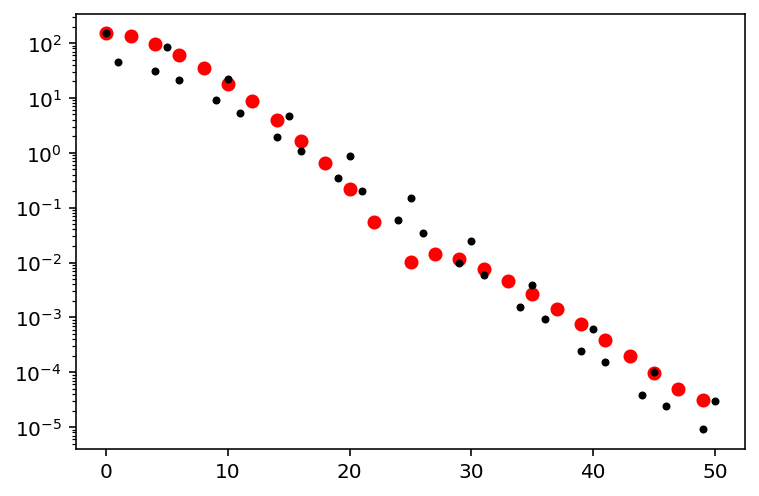

In [ ]:
plt.yscale("log")
plt.plot(data[0][0], "o", color="red")
plt.plot(data[1][0], ".", color="black");

In [ ]:
data = KdV_exact.KdV_1D(100, 5, periodic=True, return_coefficients=False)
x = utils.grid(100, periodic=True)

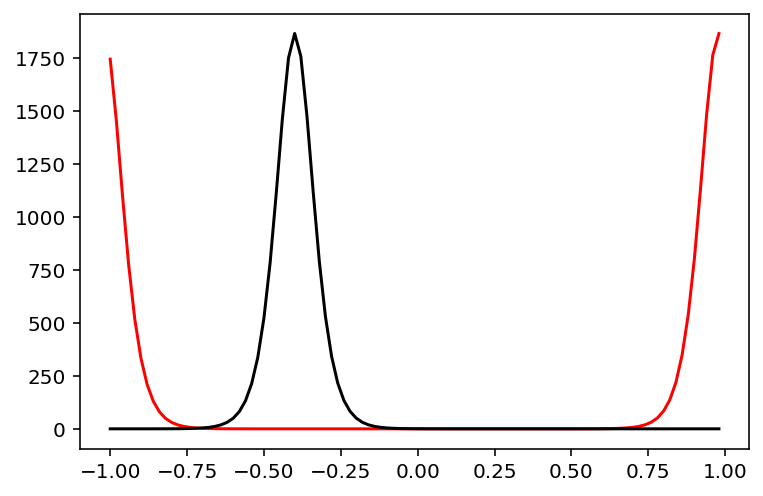

In [ ]:
plt.plot(x, data[0][0], color="red")
plt.plot(x, data[1][0], color="black");

In [ ]:
data = KdV_exact.KdV_1D(100, 5, periodic=False, return_coefficients=False)
x = utils.grid(100, periodic=False)

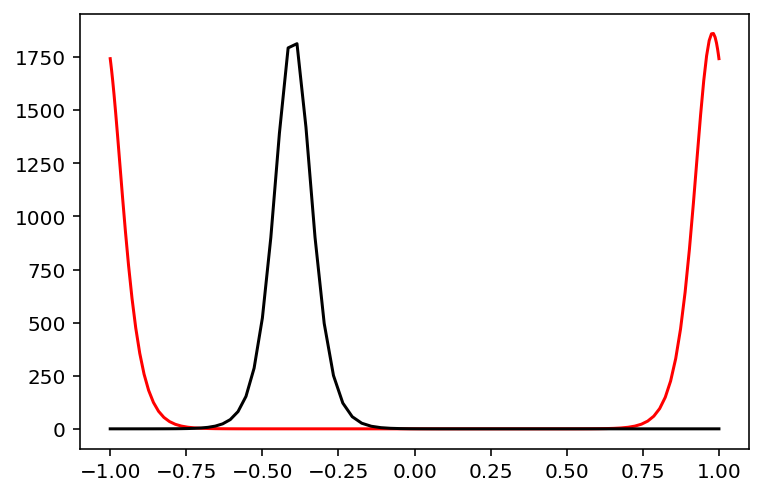

In [ ]:
plt.plot(x, data[0][0], color="red")
plt.plot(x, data[1][0], color="black");

In [ ]:
data = KdV_exact.KdV_1D(100, 5, periodic=False, return_coefficients=True)
x = utils.grid(100, periodic=False)

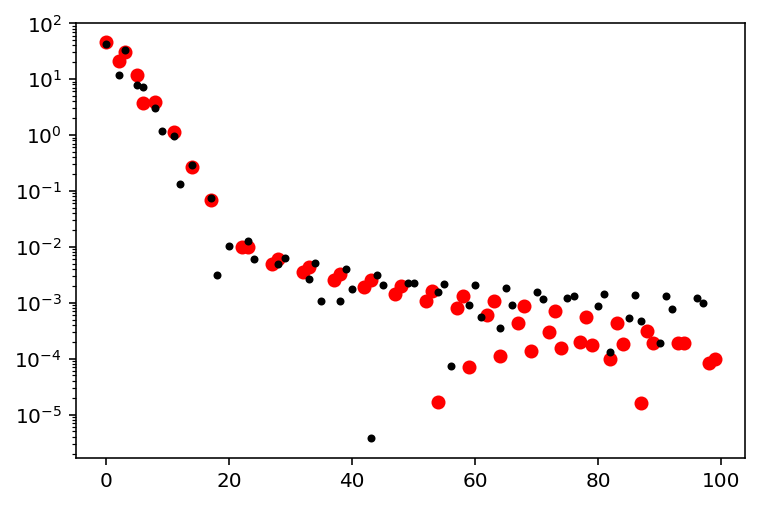

In [ ]:
plt.yscale("log")
plt.plot(data[0][1], "o", color="red")
plt.plot(data[1][1], ".", color="black");

# Two solitons

In [ ]:
data = KdV_exact.KdV_1D_solitons(100, 5, periodic=False, return_coefficients=False)
x = utils.grid(100, periodic=False)

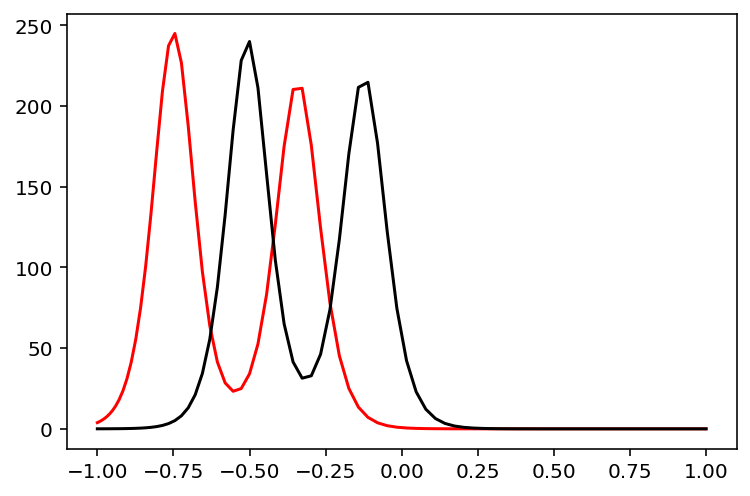

In [ ]:
plt.plot(x, data[0][1], color="red")
plt.plot(x, data[1][1], color="black");

In [ ]:
data = KdV_exact.KdV_1D(100, 5, periodic=True, return_coefficients=True)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


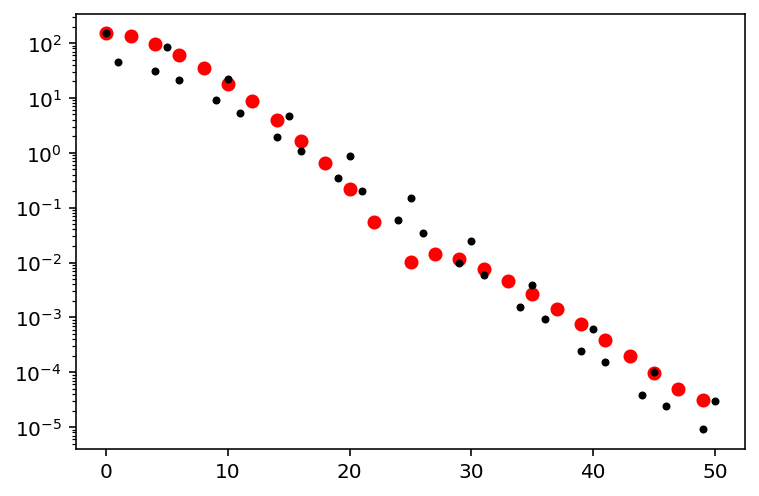

In [ ]:
plt.yscale("log")
plt.plot(data[0][0], "o", color="red")
plt.plot(data[1][0], ".", color="black");

## How many modes is enough to predict accurate solution?

#### For a single soliton

In [ ]:
data = KdV_exact.KdV_1D(100, 100, periodic=True, return_coefficients=True)

In [ ]:
errors = jnp.array([jnp.mean(jnp.linalg.norm(data[1][:, :i], axis=1) / jnp.linalg.norm(data[1][:, :], axis=1)) for i in range(1, 30)])
modes = jnp.linspace(1, 29, 29)

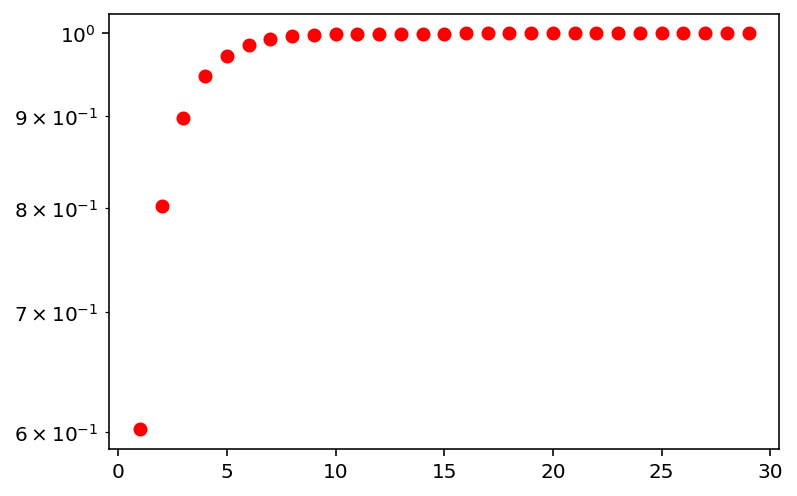

In [ ]:
plt.yscale("log")
plt.plot(modes, errors, "o", color="red");

Errors in $x$-space.

In [ ]:
exact_data = Fourier.coefficients_to_values(data[1][:, :].T, (100, 1)).T
exact_norms = jnp.linalg.norm(exact_data, axis=1)
errors = []
for i in range(1, 30):
  truncated_data = Fourier.coefficients_to_values(data[1][:, :i].T, (100, 1)).T
  error = jnp.mean(jnp.linalg.norm(exact_data - truncated_data, axis=1) / exact_norms)
  errors.append(error)

errors = jnp.array(errors)

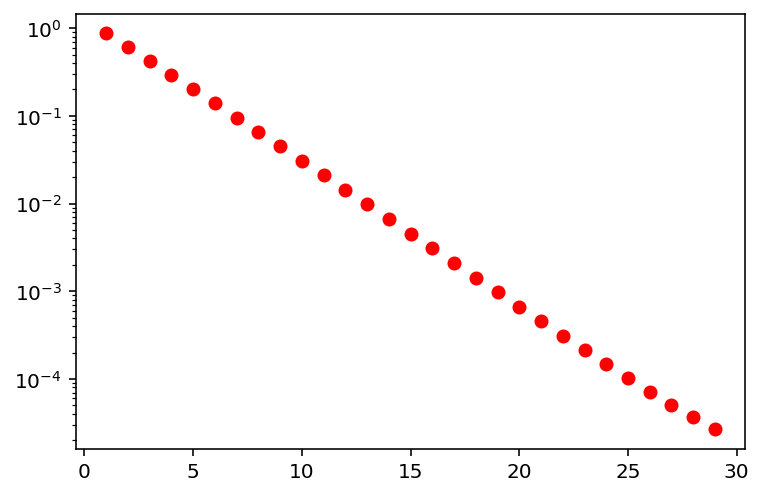

In [ ]:
plt.yscale("log")
plt.plot(modes, errors, "o", color="red");

The same story but for Chebyshev.

In [ ]:
data = KdV_exact.KdV_1D(100, 100, periodic=False, return_coefficients=True)

In [ ]:
errors = jnp.array([jnp.mean(jnp.linalg.norm(data[1][:, :i], axis=1) / jnp.linalg.norm(data[1][:, :], axis=1)) for i in range(1, 30)])
modes = jnp.linspace(1, 29, 29)

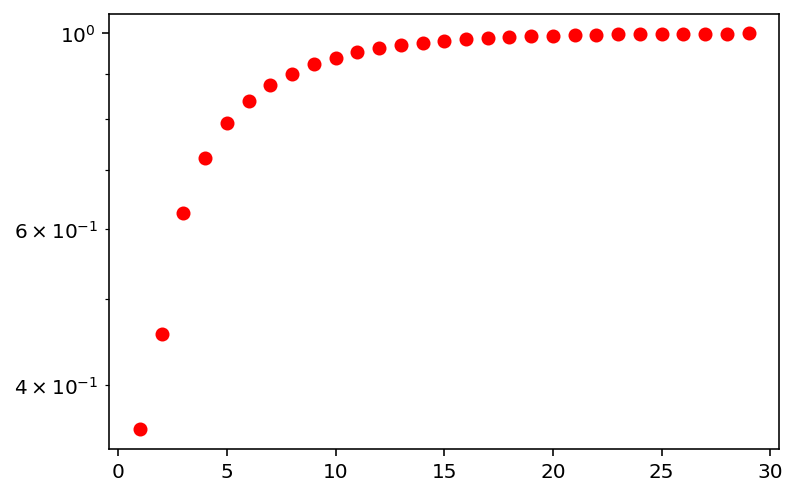

In [ ]:
plt.yscale("log")
plt.plot(modes, errors, "o", color="red");

Errors in $x$-space.

In [ ]:
exact_data = Chebyshev.coefficients_to_values(data[1][:, :].T).T
exact_norms = jnp.linalg.norm(exact_data, axis=1)
errors = []
for i in range(1, 50):
  truncated_data = Chebyshev.coefficients_to_values(jnp.pad(data[1][:, :i], ((0, 0), (0, 100-i))).T).T
  error = jnp.mean(jnp.linalg.norm(exact_data - truncated_data, axis=1) / exact_norms)
  errors.append(error)

errors = jnp.array(errors)

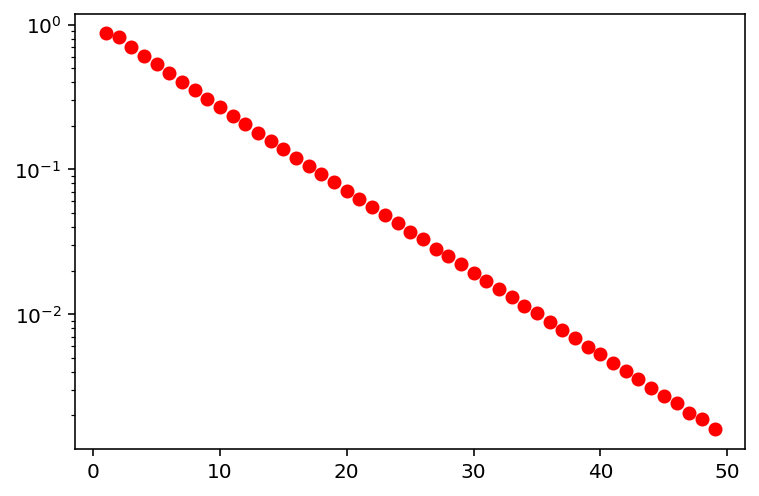

In [ ]:
plt.yscale("log")
plt.plot(range(1, 50), errors, "o", color="red");

#### For two solitons

In [ ]:
data = KdV_exact.KdV_1D_solitons(100, 100, periodic=True, return_coefficients=True)

In [ ]:
errors = jnp.array([jnp.mean(jnp.linalg.norm(data[1][:, :i], axis=1) / jnp.linalg.norm(data[1][:, :], axis=1)) for i in range(1, 30)])
modes = jnp.linspace(1, 29, 29)

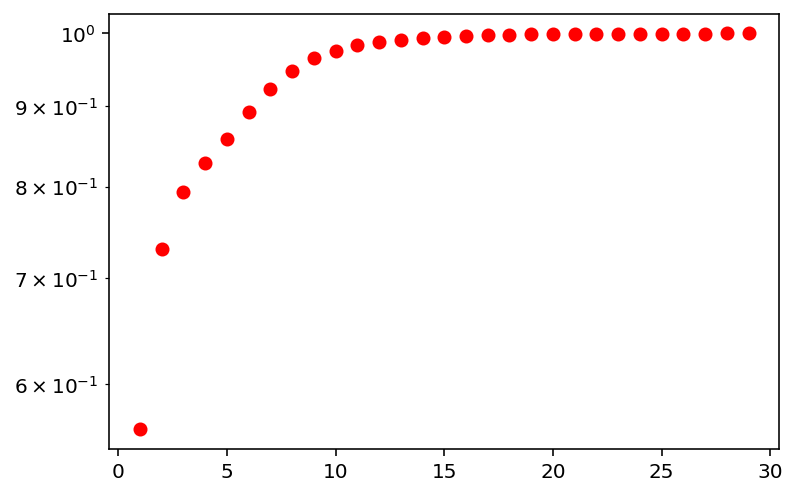

In [ ]:
plt.yscale("log")
plt.plot(modes, errors, "o", color="red");

Errors in $x$-space.

In [ ]:
exact_data = Fourier.coefficients_to_values(data[1][:, :].T, (100, 1)).T
exact_norms = jnp.linalg.norm(exact_data, axis=1)
errors = []
for i in range(1, 30):
  truncated_data = Fourier.coefficients_to_values(data[1][:, :i].T, (100, 1)).T
  error = jnp.mean(jnp.linalg.norm(exact_data - truncated_data, axis=1) / exact_norms)
  errors.append(error)

errors = jnp.array(errors)

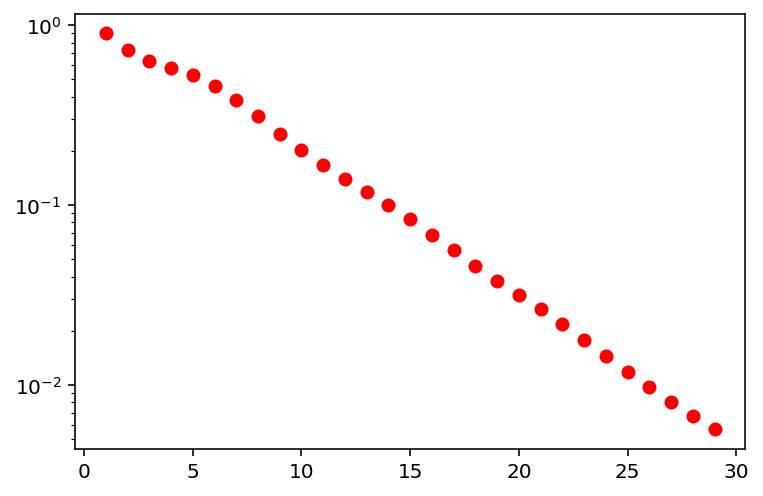

In [ ]:
plt.yscale("log")
plt.plot(modes, errors, "o", color="red");

The same story but for Chebyshev.

In [ ]:
data = KdV_exact.KdV_1D_solitons(100, 100, periodic=False, return_coefficients=True)

In [ ]:
errors = jnp.array([jnp.mean(jnp.linalg.norm(data[1][:, :i], axis=1) / jnp.linalg.norm(data[1][:, :], axis=1)) for i in range(1, 30)])
modes = jnp.linspace(1, 29, 29)

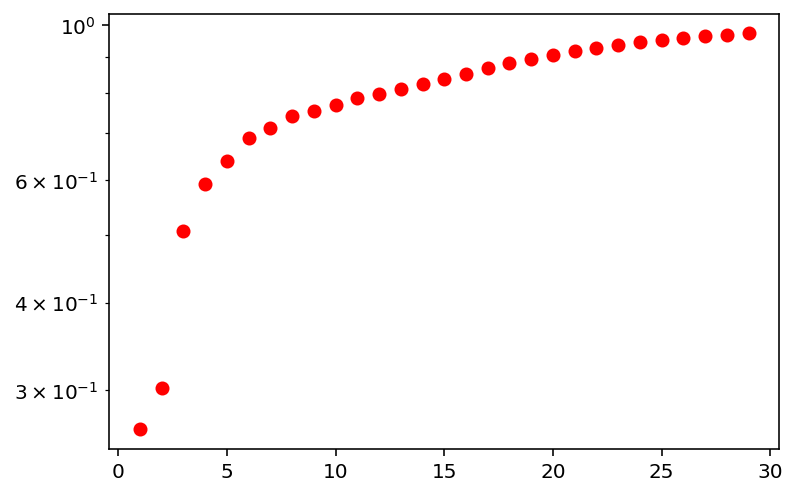

In [ ]:
plt.yscale("log")
plt.plot(modes, errors, "o", color="red");

Errors in $x$-space.

In [ ]:
exact_data = Chebyshev.coefficients_to_values(data[1][:, :].T).T
exact_norms = jnp.linalg.norm(exact_data, axis=1)
errors = []
for i in range(1, 50):
  truncated_data = Chebyshev.coefficients_to_values(jnp.pad(data[1][:, :i], ((0, 0), (0, 100-i))).T).T
  error = jnp.mean(jnp.linalg.norm(exact_data - truncated_data, axis=1) / exact_norms)
  errors.append(error)

errors = jnp.array(errors)

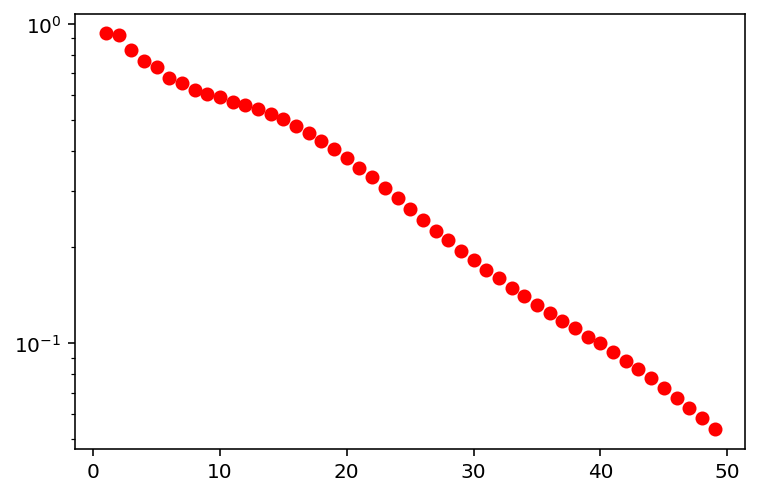

In [ ]:
plt.yscale("log")
plt.plot(range(1, 50), errors, "o", color="red");

# One soliton D = 1 + 1

Uniform grid in $x$ and $t$.

In [ ]:
data = KdV_exact.KdV_2D(100, 100, 5, periodic=True, return_coefficients=False)
x = utils.grid(100, periodic=True)
data[0].shape

(5, 100, 100)

Initial condition is repeated along time axis

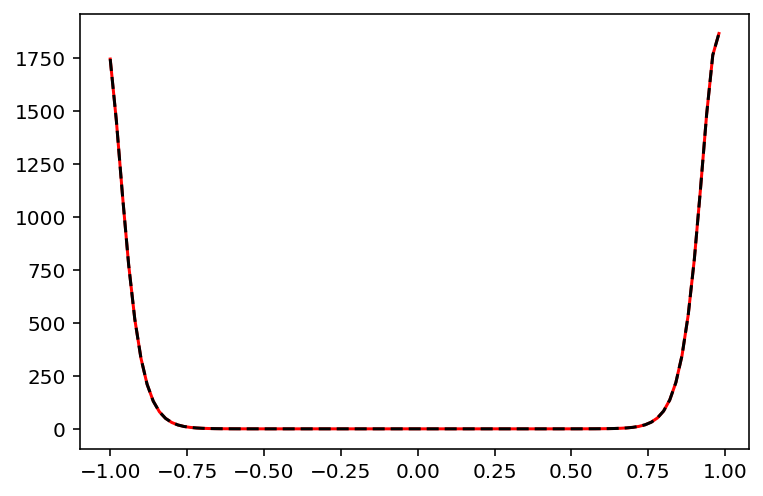

In [ ]:
plt.plot(x, data[0][0][:, 0], color="red")
plt.plot(x, data[0][0][:, 50], dashes=[4, 2, 4, 2], color="black");

For targets last axis corresponds to reasonable flow of time

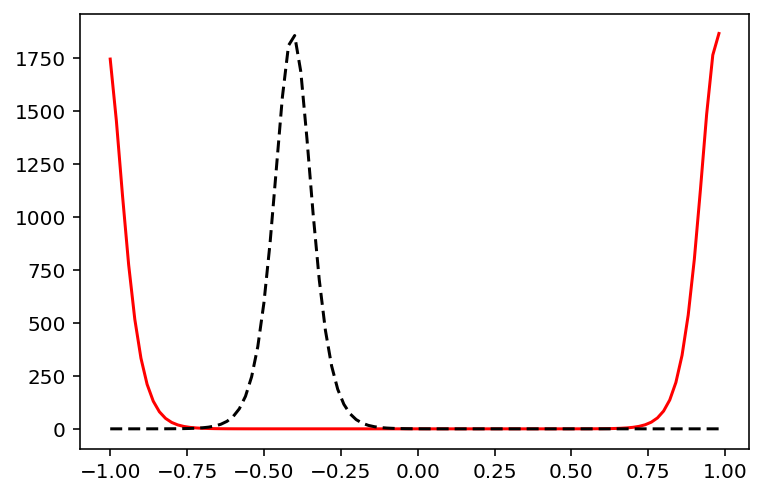

In [ ]:
plt.plot(x, data[1][0][:, 0], color="red")
plt.plot(x, data[1][0][:, -1], dashes=[4, 2, 4, 2], color="black");

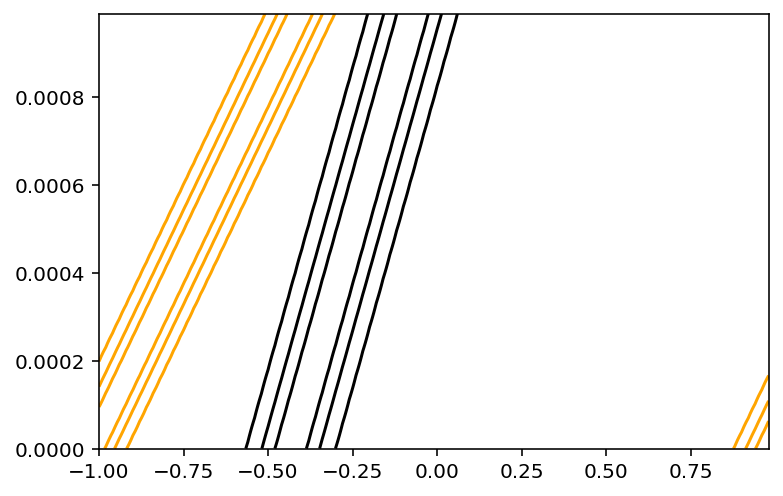

In [ ]:
n, m = 100, 100
x = utils.grid(n, periodic=True)
t = 0.001 * (utils.grid(m, periodic=True) + 1) / 2
x, t = jnp.meshgrid(x, t, indexing="ij")
plt.contour(x, t, data[1][3], levels=3, colors="black")
plt.contour(x, t, data[1][0], levels=3, colors="orange");

The same data in space of coefficients.

In [ ]:
data_FC = KdV_exact.KdV_2D(100, 100, 5, periodic=True, return_coefficients=True)
data_CC = KdV_exact.KdV_2D(100, 100, 5, periodic=False, return_coefficients=True)
data[0].shape

(5, 100, 100)

initial conditions

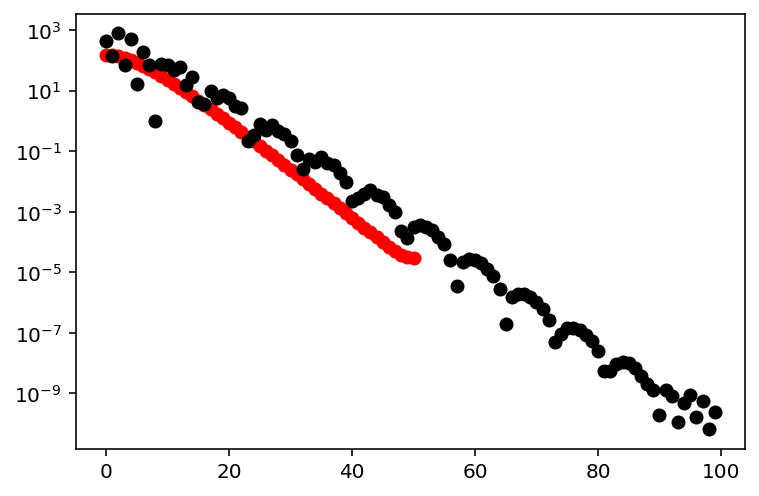

In [ ]:
plt.yscale("log")
plt.plot(abs(data_FC[0][0][:, 0]), "o", color="red")
plt.plot(abs(data_CC[0][0][:, 0]), "o", color="black");

Along x coefficients are zero because the input is constant in this direction.

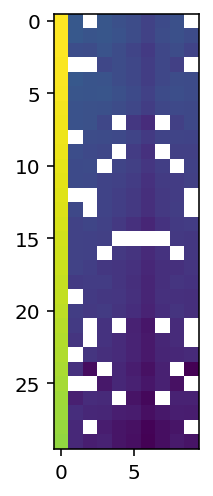

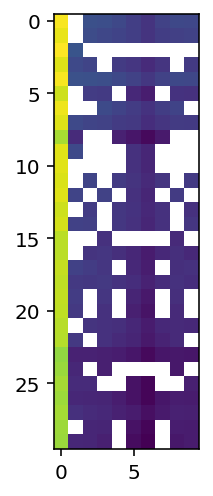

In [ ]:
plt.imshow(jnp.log10(abs(data_FC[0][0][:30, :10])))
plt.figure()
plt.imshow(jnp.log10(abs(data_CC[0][0][:30, :10])))

Whole physical field.

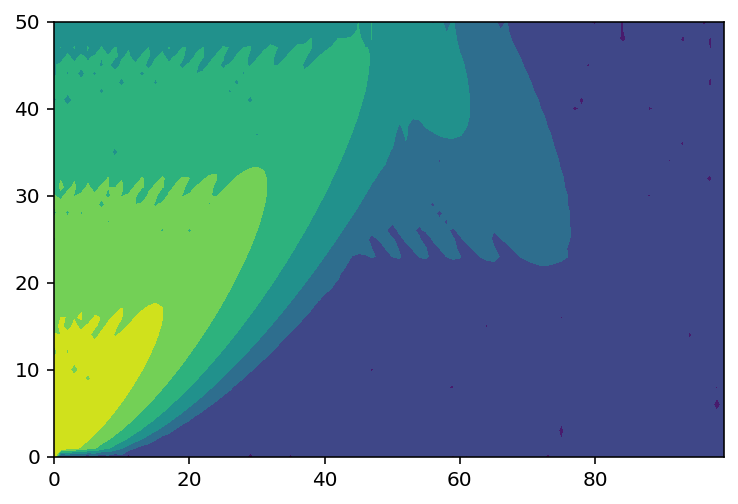

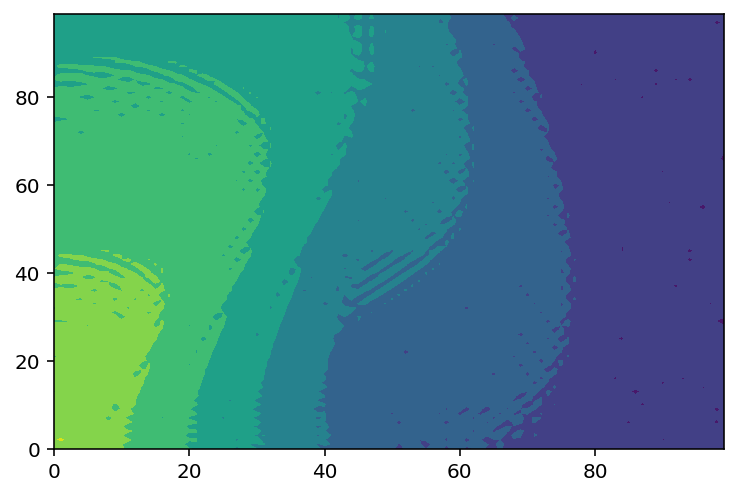

In [ ]:
plt.contourf(jnp.log10(abs(data_FC[1][0])))
plt.figure()
plt.contourf(jnp.log10(abs(data_CC[1][0])));

# Two solitons D = 1 + 1

Uniform grid in $x$ and $t$.

In [ ]:
data = KdV_exact.KdV_2D_solitons(100, 100, 5, periodic=True, return_coefficients=False)
x = utils.grid(100, periodic=True)
data[0].shape

(5, 100, 100)

Initial condition is repeated along time axis

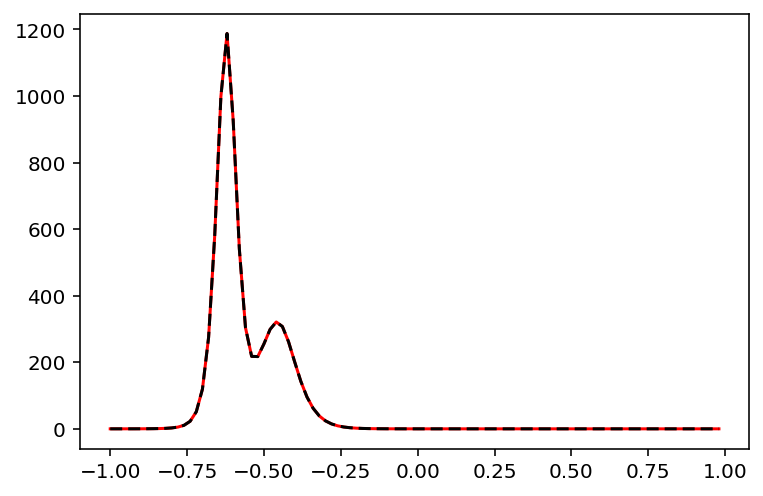

In [ ]:
plt.plot(x, data[0][0][:, 0], color="red")
plt.plot(x, data[0][0][:, 50], dashes=[4, 2, 4, 2], color="black");

For targets last axis corresponds to reasonable flow of time

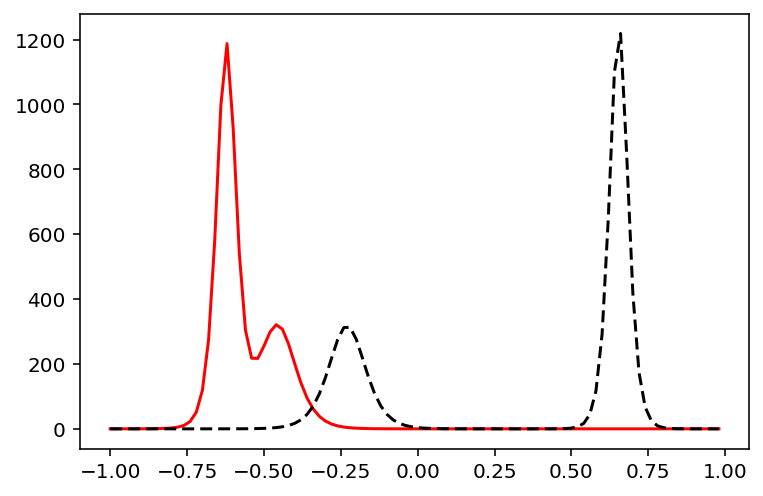

In [ ]:
plt.plot(x, data[1][0][:, 0], color="red")
plt.plot(x, data[1][0][:, -1], dashes=[4, 2, 4, 2], color="black");

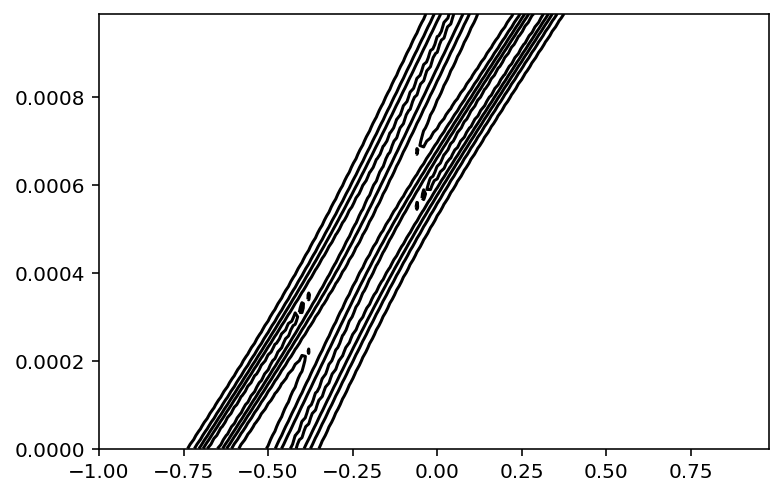

In [ ]:
n, m = 100, 100
x = utils.grid(n, periodic=True)
t = 0.001 * (utils.grid(m, periodic=True) + 1) / 2
x, t = jnp.meshgrid(x, t, indexing="ij")
plt.contour(x, t, data[1][3], colors="black");

The same data in space of coefficients.

In [ ]:
data_FC = KdV_exact.KdV_2D_solitons(100, 100, 5, periodic=True, return_coefficients=True)
data_CC = KdV_exact.KdV_2D_solitons(100, 100, 5, periodic=False, return_coefficients=True)
data[0].shape

(5, 100, 100)

initial conditions

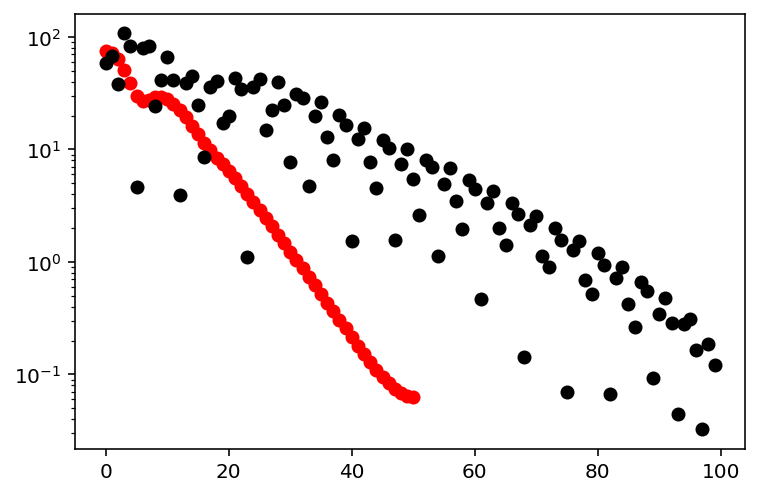

In [ ]:
plt.yscale("log")
plt.plot(abs(data_FC[0][0][:, 0]), "o", color="red")
plt.plot(abs(data_CC[0][0][:, 0]), "o", color="black");

Along x coefficients are zero because the input is constant in this direction.

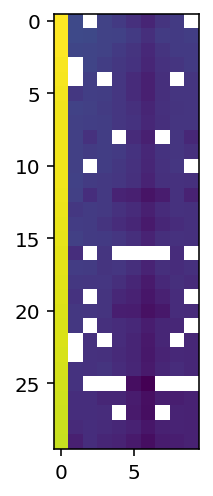

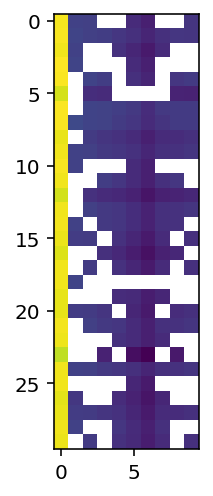

In [ ]:
plt.imshow(jnp.log10(abs(data_FC[0][0][:30, :10])))
plt.figure()
plt.imshow(jnp.log10(abs(data_CC[0][0][:30, :10])))

Whole physical field.

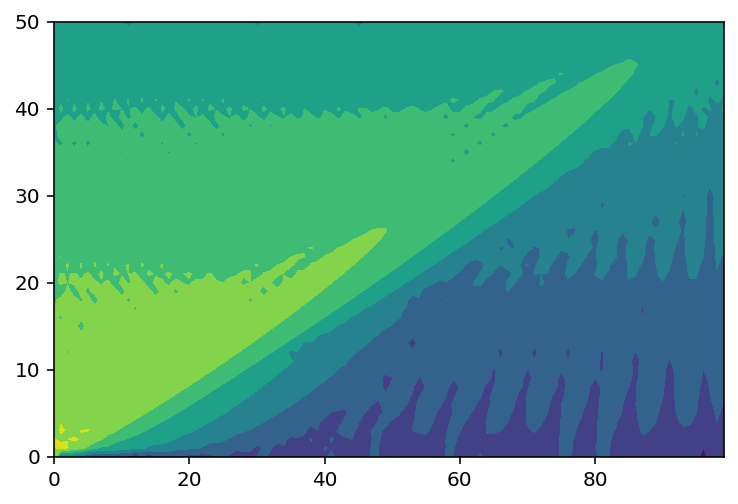

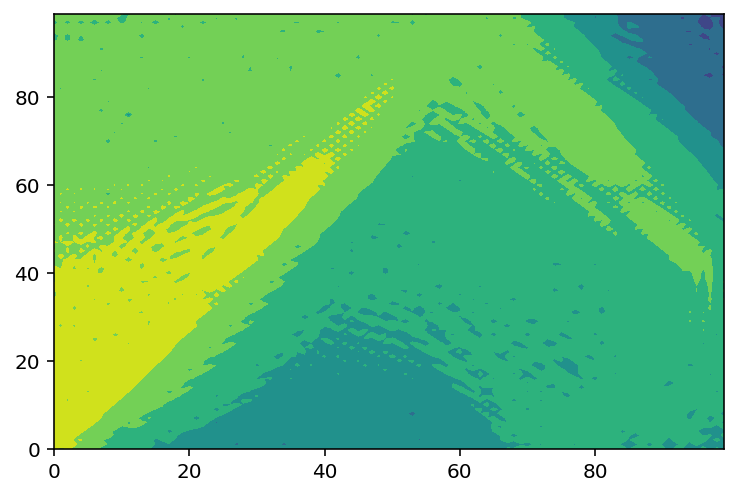

In [ ]:
plt.contourf(jnp.log10(abs(data_FC[1][0])))
plt.figure()
plt.contourf(jnp.log10(abs(data_CC[1][0])));

# How many modes is enough to predict accurate solution?

#### For a single soliton

In [ ]:
n_batch = 20
data_FC = KdV_exact.KdV_2D(100, 100, n_batch, periodic=True, return_coefficients=True)
data_FC[0].shape

(20, 51, 100)

In [ ]:
errors = jnp.array([jnp.mean(jnp.linalg.norm(data_FC[1][:, :i, :i].reshape(n_batch, -1), axis=1) / jnp.linalg.norm(data_FC[1].reshape(n_batch, -1), axis=1)) for i in range(1, 30)])
modes = jnp.linspace(1, 29, 29)

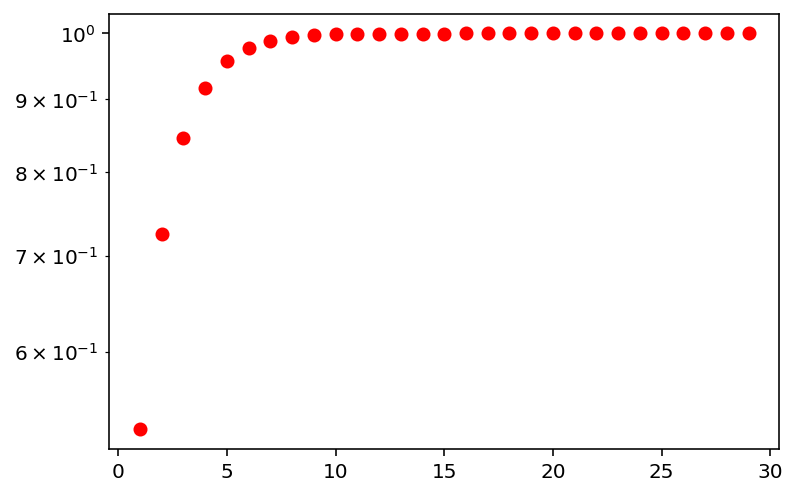

In [ ]:
plt.yscale("log")
plt.plot(modes, errors, "o", color="red");

Errors in $x$-space.

In [ ]:
exact_data.shape

(100, 20, 100)

In [ ]:
i = 2
z = jnp.transpose(utils.mixed_coefficients_to_values(jnp.transpose(jnp.pad(data[1][:, :i, :i], ((0, 0), (0, 0), (0, 100-i))), axes=(1, 2, 0)), 100), axes=(2, 0, 1))

In [ ]:
z.shape

(5, 100, 100)

In [ ]:
W = utils.get_interpolation_matrix(utils.grid(100, periodic=True), 100)
exact_data = jnp.transpose(utils.mixed_coefficients_to_values(jnp.transpose(data_FC[1], axes=(1, 2, 0)), 100), axes=(2, 0, 1))
#exact_data = dot_general(W, exact_data, (((1,), (2,)), ((), ()))) / dot_general(W, jnp.ones_like(exact_data), (((1,), (2,)), ((), ())))
exact_data = jnp.dot(exact_data, W.T) / jnp.dot(jnp.ones_like(exact_data), W.T)
exact_norms = jnp.linalg.norm(exact_data.reshape(n_batch, -1), axis=1)
errors = []
for i in range(1, 30):
  truncated_data = jnp.transpose(utils.mixed_coefficients_to_values(jnp.transpose(jnp.pad(data_FC[1][:, :i, :i], ((0, 0), (0, 0), (0, 100-i))), axes=(1, 2, 0)), 100), axes=(2, 0, 1))
  truncated_data = jnp.dot(truncated_data, W.T) / jnp.dot(jnp.ones_like(truncated_data), W.T)
  error = jnp.mean(jnp.linalg.norm((exact_data - truncated_data).reshape(n_batch, -1), axis=1) / exact_norms)
  errors.append(error)

errors = jnp.array(errors)

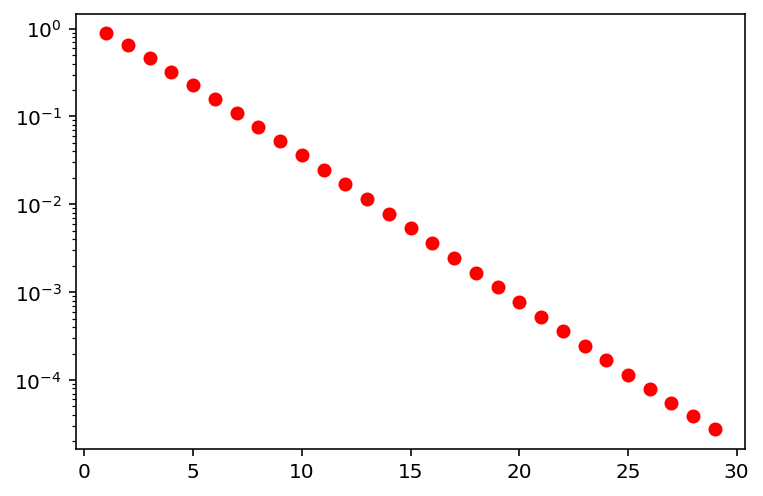

In [ ]:
plt.yscale("log")
plt.plot(modes, errors, "o", color="red");

The same story but for Chebyshev.

In [ ]:
n_batch = 20
data_CC = KdV_exact.KdV_2D(100, 100, n_batch, periodic=False, return_coefficients=True)
data_CC[0].shape

(20, 100, 100)

In [ ]:
errors = jnp.array([jnp.mean(jnp.linalg.norm(data_CC[1][:, :i, :i].reshape(n_batch, -1), axis=1) / jnp.linalg.norm(data_CC[1].reshape(n_batch, -1), axis=1)) for i in range(1, 30)])
modes = jnp.linspace(1, 29, 29)

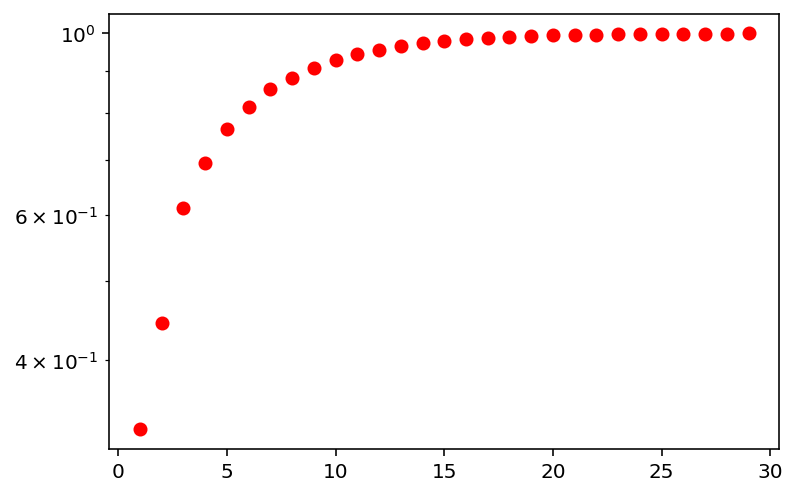

In [ ]:
plt.yscale("log")
plt.plot(modes, errors, "o", color="red");

Errors in $x$-space.

In [ ]:
from jax.lax import dot_general

In [ ]:
W = utils.get_interpolation_matrix(utils.grid(100, periodic=True), 100)
exact_data = jnp.transpose(Chebyshev.coefficients_to_values(jnp.transpose(data_CC[1], axes=(1, 2, 0))), axes=(2, 0, 1))
exact_data = dot_general(W, exact_data, (((1,), (2,)), ((), ()))) / dot_general(W, jnp.ones_like(exact_data), (((1,), (2,)), ((), ())))
exact_data = dot_general(W, exact_data, (((1,), (2,)), ((), ()))) / dot_general(W, jnp.ones_like(exact_data), (((1,), (2,)), ((), ())))
exact_norms = jnp.linalg.norm(exact_data.reshape(-1, n_batch), axis=0)
errors = []
for i in range(1, 30):
  truncated_data = jnp.transpose(Chebyshev.coefficients_to_values(jnp.transpose(jnp.pad(data_CC[1][:, :i, :i], ((0, 0), (0, 100-i), (0, 100-i))), axes=(1, 2, 0))), axes=(2, 0, 1))
  truncated_data = dot_general(W, truncated_data, (((1,), (2,)), ((), ()))) / dot_general(W, jnp.ones_like(truncated_data), (((1,), (2,)), ((), ())))
  truncated_data = dot_general(W, truncated_data, (((1,), (2,)), ((), ()))) / dot_general(W, jnp.ones_like(truncated_data), (((1,), (2,)), ((), ())))
  error = jnp.mean(jnp.linalg.norm((exact_data - truncated_data).reshape(-1, n_batch), axis=0) / exact_norms)
  errors.append(error)

errors = jnp.array(errors)

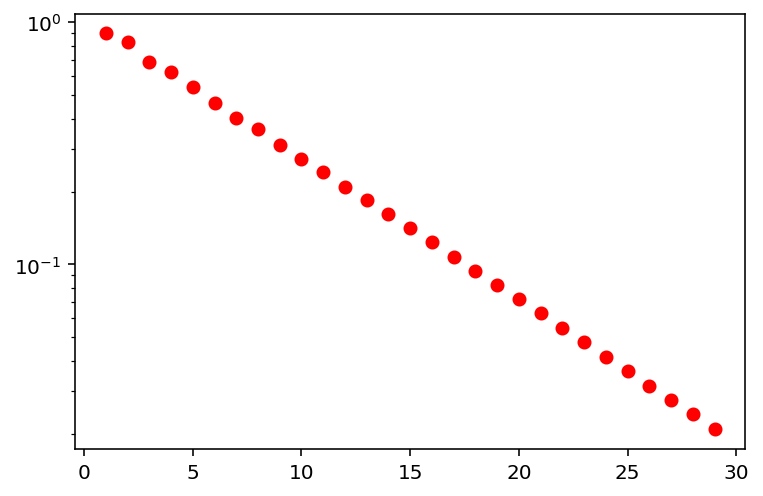

In [ ]:
plt.yscale("log")
plt.plot(modes, errors, "o", color="red");

#### For two solitons

In [ ]:
n_batch = 20
data_FC = KdV_exact.KdV_2D_solitons(100, 100, n_batch, periodic=True, return_coefficients=True)
data_FC[0].shape

(20, 51, 100)

In [ ]:
errors = jnp.array([jnp.mean(jnp.linalg.norm(data_FC[1][:, :i, :i].reshape(n_batch, -1), axis=1) / jnp.linalg.norm(data_FC[1].reshape(n_batch, -1), axis=1)) for i in range(1, 30)])
modes = jnp.linspace(1, 29, 29)

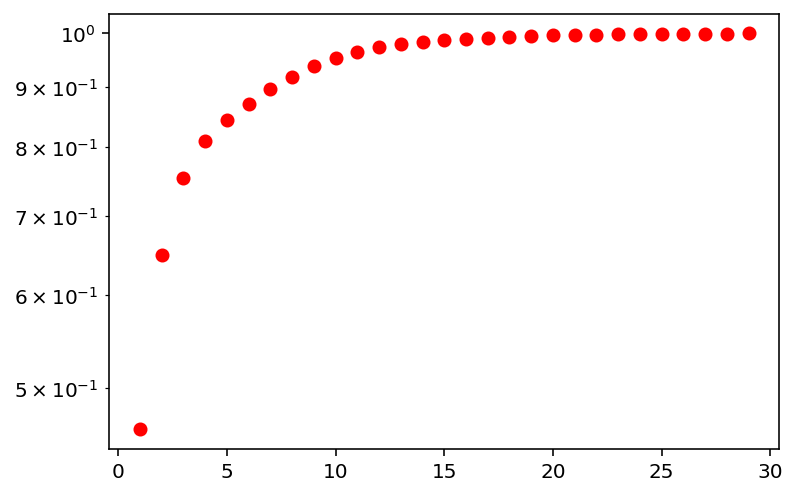

In [ ]:
plt.yscale("log")
plt.plot(modes, errors, "o", color="red");

Errors in $x$-space.

In [ ]:
exact_data.shape

(100, 100, 20)

In [ ]:
i = 2
z = jnp.transpose(utils.mixed_coefficients_to_values(jnp.transpose(jnp.pad(data[1][:, :i, :i], ((0, 0), (0, 0), (0, 100-i))), axes=(1, 2, 0)), 100), axes=(2, 0, 1))

In [ ]:
z.shape

(5, 100, 100)

In [ ]:
W = utils.get_interpolation_matrix(utils.grid(100, periodic=True), 100)
exact_data = jnp.transpose(utils.mixed_coefficients_to_values(jnp.transpose(data_FC[1], axes=(1, 2, 0)), 100), axes=(2, 0, 1))
#exact_data = dot_general(W, exact_data, (((1,), (2,)), ((), ()))) / dot_general(W, jnp.ones_like(exact_data), (((1,), (2,)), ((), ())))
exact_data = jnp.dot(exact_data, W.T) / jnp.dot(jnp.ones_like(exact_data), W.T)
exact_norms = jnp.linalg.norm(exact_data.reshape(n_batch, -1), axis=1)
errors = []
for i in range(1, 30):
  truncated_data = jnp.transpose(utils.mixed_coefficients_to_values(jnp.transpose(jnp.pad(data_FC[1][:, :i, :i], ((0, 0), (0, 0), (0, 100-i))), axes=(1, 2, 0)), 100), axes=(2, 0, 1))
  truncated_data = jnp.dot(truncated_data, W.T) / jnp.dot(jnp.ones_like(truncated_data), W.T)
  error = jnp.mean(jnp.linalg.norm((exact_data - truncated_data).reshape(n_batch, -1), axis=1) / exact_norms)
  errors.append(error)

errors = jnp.array(errors)

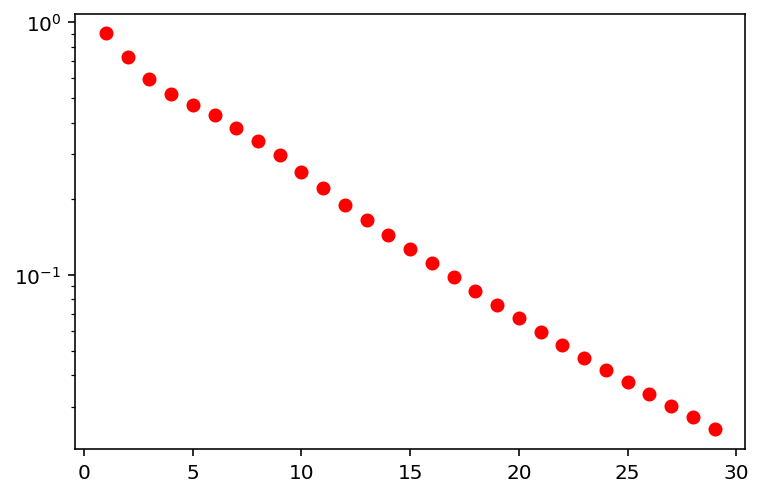

In [ ]:
plt.yscale("log")
plt.plot(modes, errors, "o", color="red");

The same story but for Chebyshev.

In [ ]:
n_batch = 20
data_CC = KdV_exact.KdV_2D_solitons(100, 100, n_batch, periodic=False, return_coefficients=True)
data_CC[0].shape

(20, 100, 100)

In [ ]:
errors = jnp.array([jnp.mean(jnp.linalg.norm(data_CC[1][:, :i, :i].reshape(n_batch, -1), axis=1) / jnp.linalg.norm(data_CC[1].reshape(n_batch, -1), axis=1)) for i in range(1, 30)])
modes = jnp.linspace(1, 29, 29)

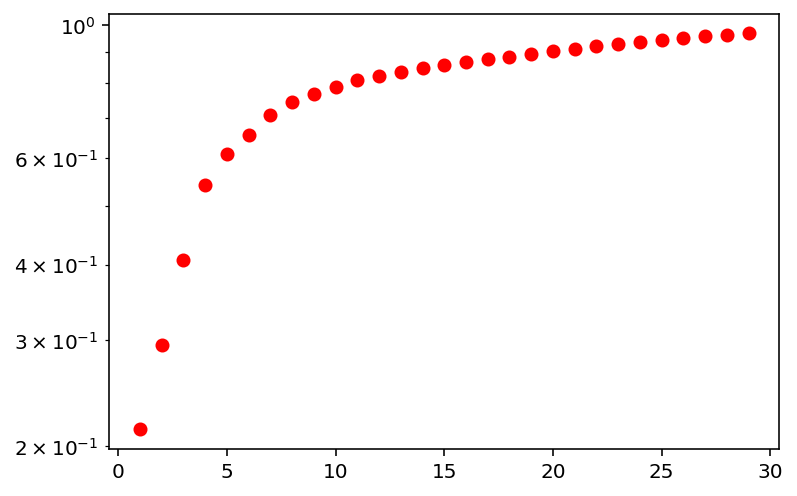

In [ ]:
plt.yscale("log")
plt.plot(modes, errors, "o", color="red");

Errors in $x$-space.

In [ ]:
from jax.lax import dot_general

In [ ]:
W = utils.get_interpolation_matrix(utils.grid(100, periodic=True), 100)
exact_data = jnp.transpose(Chebyshev.coefficients_to_values(jnp.transpose(data_CC[1], axes=(1, 2, 0))), axes=(2, 0, 1))
exact_data = dot_general(W, exact_data, (((1,), (2,)), ((), ()))) / dot_general(W, jnp.ones_like(exact_data), (((1,), (2,)), ((), ())))
exact_data = dot_general(W, exact_data, (((1,), (2,)), ((), ()))) / dot_general(W, jnp.ones_like(exact_data), (((1,), (2,)), ((), ())))
exact_norms = jnp.linalg.norm(exact_data.reshape(-1, n_batch), axis=0)
errors = []
for i in range(1, 50):
  truncated_data = jnp.transpose(Chebyshev.coefficients_to_values(jnp.transpose(jnp.pad(data_CC[1][:, :i, :i], ((0, 0), (0, 100-i), (0, 100-i))), axes=(1, 2, 0))), axes=(2, 0, 1))
  truncated_data = dot_general(W, truncated_data, (((1,), (2,)), ((), ()))) / dot_general(W, jnp.ones_like(truncated_data), (((1,), (2,)), ((), ())))
  truncated_data = dot_general(W, truncated_data, (((1,), (2,)), ((), ()))) / dot_general(W, jnp.ones_like(truncated_data), (((1,), (2,)), ((), ())))
  error = jnp.mean(jnp.linalg.norm((exact_data - truncated_data).reshape(-1, n_batch), axis=0) / exact_norms)
  errors.append(error)

errors = jnp.array(errors)

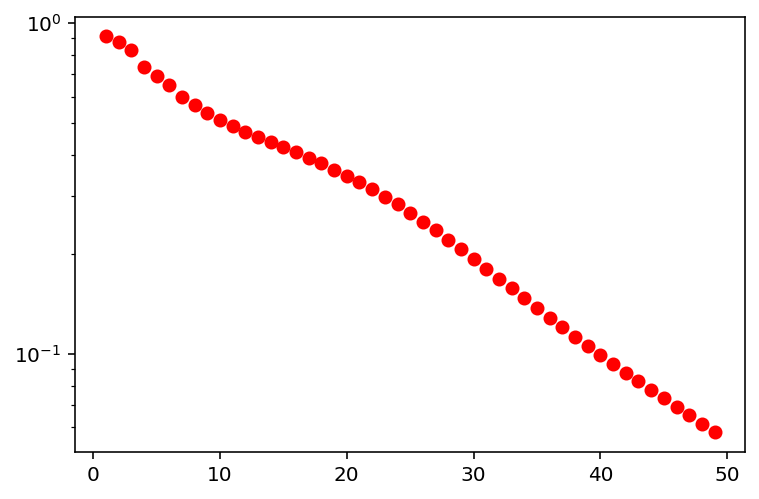

In [ ]:
plt.yscale("log")
plt.plot(range(1, 50), errors, "o", color="red");